In [1]:
import pandas as pd
import numpy as np

In [2]:
ds=pd.read_table("/home/ayush/Desktop/english_dataset.tsv")

In [3]:
ds

,text_id,text,task_1,task_2,task_3
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NOT,NONE,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NOT,NONE,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NOT,NONE,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NOT,NONE,NONE
...,...,...,...,...,...
5847,hasoc_en_5848,"@davidfrum @trueblueusa1 That's cute and all, ...",HOF,PRFN,UNT
5848,hasoc_en_5849,a recession issa comin' #maga #magamyass #fuck...,NOT,NONE,NONE
5849,hasoc_en_5850,#DoctorsFightBack Will 'The Mad n Irrational ...,HOF,OFFN,TIN
5850,hasoc_en_5851,#ShiningIndia #educatedindia or more like RUND...,HOF,OFFN,UNT


In [4]:
ds.isnull().sum()


text_id    0
text       0
task_1     0
task_2     0
task_3     0
dtype: int64

In [5]:
tes=ds.filter(["text","task_2"],axis=1)

In [6]:
tes

,text,task_2
0,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NONE
1,@politico No. We should remember very clearly ...,HATE
2,@cricketworldcup Guess who would be the winner...,NONE
3,Corbyn is too politically intellectual for #Bo...,NONE
4,All the best to #TeamIndia for another swimmin...,NONE
...,...,...
5847,"@davidfrum @trueblueusa1 That's cute and all, ...",PRFN
5848,a recession issa comin' #maga #magamyass #fuck...,NONE
5849,#DoctorsFightBack Will 'The Mad n Irrational ...,OFFN
5850,#ShiningIndia #educatedindia or more like RUND...,OFFN


In [7]:
tes.loc[tes['task_2']!="NONE",'task_2']=1

In [8]:
tes=tes.replace("NONE",0)

In [9]:
tes

,text,task_2
0,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,0
1,@politico No. We should remember very clearly ...,1
2,@cricketworldcup Guess who would be the winner...,0
3,Corbyn is too politically intellectual for #Bo...,0
4,All the best to #TeamIndia for another swimmin...,0
...,...,...
5847,"@davidfrum @trueblueusa1 That's cute and all, ...",1
5848,a recession issa comin' #maga #magamyass #fuck...,0
5849,#DoctorsFightBack Will 'The Mad n Irrational ...,1
5850,#ShiningIndia #educatedindia or more like RUND...,1


In [10]:
data=tes['text']

In [11]:
data

0       #DhoniKeepsTheGlove | WATCH: Sports Minister K...
1       @politico No. We should remember very clearly ...
2       @cricketworldcup Guess who would be the winner...
3       Corbyn is too politically intellectual for #Bo...
4       All the best to #TeamIndia for another swimmin...
                              ...                        
5847    @davidfrum @trueblueusa1 That's cute and all, ...
5848    a recession issa comin' #maga #magamyass #fuck...
5849    #DoctorsFightBack  Will 'The Mad n Irrational ...
5850    #ShiningIndia #educatedindia or more like RUND...
5851    Could this be our new Prime Minister?     #Ric...
Name: text, Length: 5852, dtype: object

In [12]:
data

0       #DhoniKeepsTheGlove | WATCH: Sports Minister K...
1       @politico No. We should remember very clearly ...
2       @cricketworldcup Guess who would be the winner...
3       Corbyn is too politically intellectual for #Bo...
4       All the best to #TeamIndia for another swimmin...
                              ...                        
5847    @davidfrum @trueblueusa1 That's cute and all, ...
5848    a recession issa comin' #maga #magamyass #fuck...
5849    #DoctorsFightBack  Will 'The Mad n Irrational ...
5850    #ShiningIndia #educatedindia or more like RUND...
5851    Could this be our new Prime Minister?     #Ric...
Name: text, Length: 5852, dtype: object

In [13]:
news=[]
from  nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


ps=PorterStemmer()

In [14]:


import re
for i in range(0, len(tes)):
  review = re.sub('[^a-zA-Z0-9#!@$%&]',' ', tes['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  news.append(review)



In [15]:

cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(news).toarray()
y=tes['task_2']
y=y.iloc[:].values


In [16]:
y

array([0, 1, 0, ..., 1, 1, 1])

In [17]:
news

['#dhonikeepstheglov watch sport minist kiren rijiju issu statement back ms dhoni balidaan badg tell bcci take matter icc keep govern know nation pride involv http co zuo5335rjr',
 '@politico rememb clearli #individual1 admit treason #trumpisatraitor #mccainsahero #johnmccainday',
 '@cricketworldcup guess would winner #cwc19 team get maximum point abandon match #shameonicc #wivseng @icc',
 'corbyn polit intellectu #borisjohnsonshouldnotbepm wait #generalelectionnow http co pt8kmjfxjj',
 'best #teamindia anoth swim competit sunday #pakistan #indvpak #shameonicc #cwc19 #cwc19rain http co mg2cie0zib',
 '@kellymiller513 @therealoj32 hope rememb wipe blood pic taken #bloodonhishand #murder',
 '@icc latest design #wc2019 trophi #cwc2019 #cwc19 #shameonicc http co g3mruphbz',
 '#ado #trendingnow #blacklivesmatt #justic #fucktrump central park five prosecutor elizabeth leder columbia law school http co 7s1lu7wi53',
 'thank support! wow 600k graffiti massiv impact nowaday not forget show opinio

In [18]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [19]:
x_test.shape

(1171, 2000)

In [20]:
y_test.shape

(1171,)

In [21]:
y_test

array([1, 1, 0, ..., 1, 0, 0])

In [22]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
model=MultinomialNB().fit(x_train,y_train)
pred=model.predict(x_test)

In [24]:
pred

array([0, 1, 1, ..., 1, 0, 0])

In [25]:
import matplotlib.pyplot as plt

In [26]:

from sklearn.metrics import accuracy_score
a=accuracy_score(pred,y_test)
a

0.6464560204953032

In [27]:
#knn

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
maxi=0

In [30]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    if(test_accuracy[i]>maxi):
        maxi=test_accuracy[i]
maxi

0.667805294619983

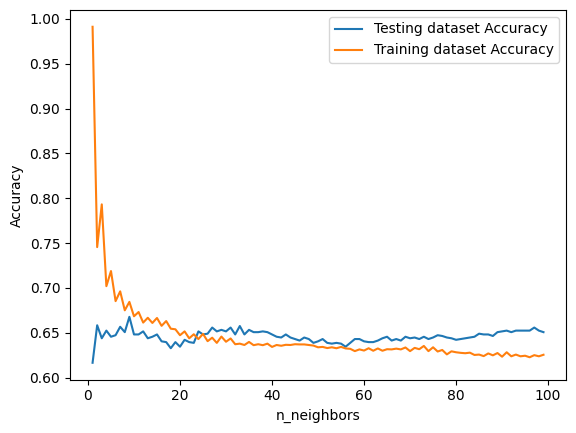

In [31]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [33]:
#Naive bias
classifier_np = GaussianNB()
classifier_np.fit(x_train, y_train)

GaussianNB()

In [34]:
y_pred_np = classifier_np.predict(x_test)


In [35]:
a=accuracy_score(y_pred_np,y_test)
a


0.5354397950469684

In [36]:
#LR

classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(x_train, y_train)



LogisticRegression(random_state=0)

In [37]:
lr = classifier_lr.predict(x_test)
accuracy_score(lr,y_test)


0.667805294619983

In [38]:
#decision Tree


classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(x_train, y_train)



DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
dt = classifier_dt.predict(x_test)
accuracy_score(dt,y_test)

0.6182749786507259

In [40]:
#Random Forest


classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [41]:
rf = classifier_rf.predict(x_test)
accuracy_score(rf,y_test)

0.6524338172502135

In [42]:
#knn


classifier_knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier_knn.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=2)

In [43]:
knn=classifier_knn.score(x_test,y_test)

In [44]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=100000
hot_text=[one_hot(word,vocab_size) for word in news]


2022-11-10 23:28:24.783351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 23:28:24.895254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-10 23:28:24.895271: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 23:28:24.916677: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 23:28:25.455680: W tensorflow/stream_executor/platform/de

In [45]:
hot_text

[[6231,
  54330,
  89873,
  34725,
  58767,
  51455,
  56684,
  73386,
  30828,
  78525,
  80796,
  45436,
  7012,
  97526,
  62117,
  39377,
  23778,
  95906,
  90265,
  92505,
  8144,
  22923,
  46134,
  95579,
  97483,
  90238,
  57479],
 [95845, 51527, 68660, 17404, 23702, 61063, 62137, 91529, 76140],
 [32416,
  82816,
  71082,
  42221,
  46080,
  70771,
  53490,
  63092,
  58250,
  81391,
  72783,
  54215,
  76712,
  95906],
 [11171, 22153, 1992, 34012, 2422, 2057, 97483, 90238, 24596],
 [95572,
  21738,
  56320,
  71862,
  48216,
  98482,
  14670,
  82810,
  54215,
  46080,
  7309,
  97483,
  90238,
  49849],
 [78421, 11760, 14540, 51527, 2613, 37327, 70981, 667, 50174, 87110],
 [95906, 97508, 39731, 86834, 6764, 5374, 46080, 54215, 97483, 90238, 25119],
 [43623,
  18421,
  67073,
  23780,
  38211,
  14883,
  78913,
  68062,
  80115,
  84006,
  14877,
  31148,
  26187,
  76426,
  97483,
  90238,
  1037],
 [63009,
  27711,
  76669,
  40806,
  81659,
  83212,
  23583,
  85651,
  79

In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


emb_len=0
for i in range( 0, len(hot_text)):
    emb_len=max(emb_len,len(hot_text[i]))
emb_len



89

In [47]:
pad=pad_sequences(hot_text,padding='pre',maxlen=emb_len)
pad


array([[    0,     0,     0, ..., 97483, 90238, 57479],
       [    0,     0,     0, ..., 62137, 91529, 76140],
       [    0,     0,     0, ..., 54215, 76712, 95906],
       ...,
       [    0,     0,     0, ..., 97483, 90238,  1381],
       [    0,     0,     0, ..., 97483, 90238, 49968],
       [    0,     0,     0, ..., 97483, 90238, 43276]], dtype=int32)

In [48]:
#deep learing
emb_features=100
import tensorflow

In [49]:
model=tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.layers.Embedding(vocab_size,100,input_length=250))
model.add(tensorflow.keras.layers.Dropout(0.5))
model.add(tensorflow.keras.layers.LSTM(500))
model.add(tensorflow.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

2022-11-10 23:28:26.515036: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-10 23:28:26.515056: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-10 23:28:26.515072: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ayush-ROG-Strix-G512LI-G512LI): /proc/driver/nvidia/version does not exist
2022-11-10 23:28:26.515235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          10000000  
                                                                 
 dropout (Dropout)           (None, 250, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 500)               1202000   
                                                                 
 dense (Dense)               (None, 1)                 501       
                                                                 
Total params: 11,202,501
Trainable params: 11,202,501
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='binary_crossentropy',metrics=['acc'])

In [51]:
xtrain=np.array(pad)
ytrain=np.array(y)

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(xtrain,ytrain,test_size=0.2)

In [53]:
x_test.shape

(1171, 2000)

In [54]:
model1=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64)

Epoch 1/20


ValueError: in user code:

    File "/home/ayush/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/ayush/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ayush/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/ayush/.local/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/home/ayush/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ayush/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 250), found shape=(None, 2000)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:


pt=pd.DataFrame(model1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
    

